In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from tpot import TPOTClassifier
from joblib import dump
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

## Визуализация данных

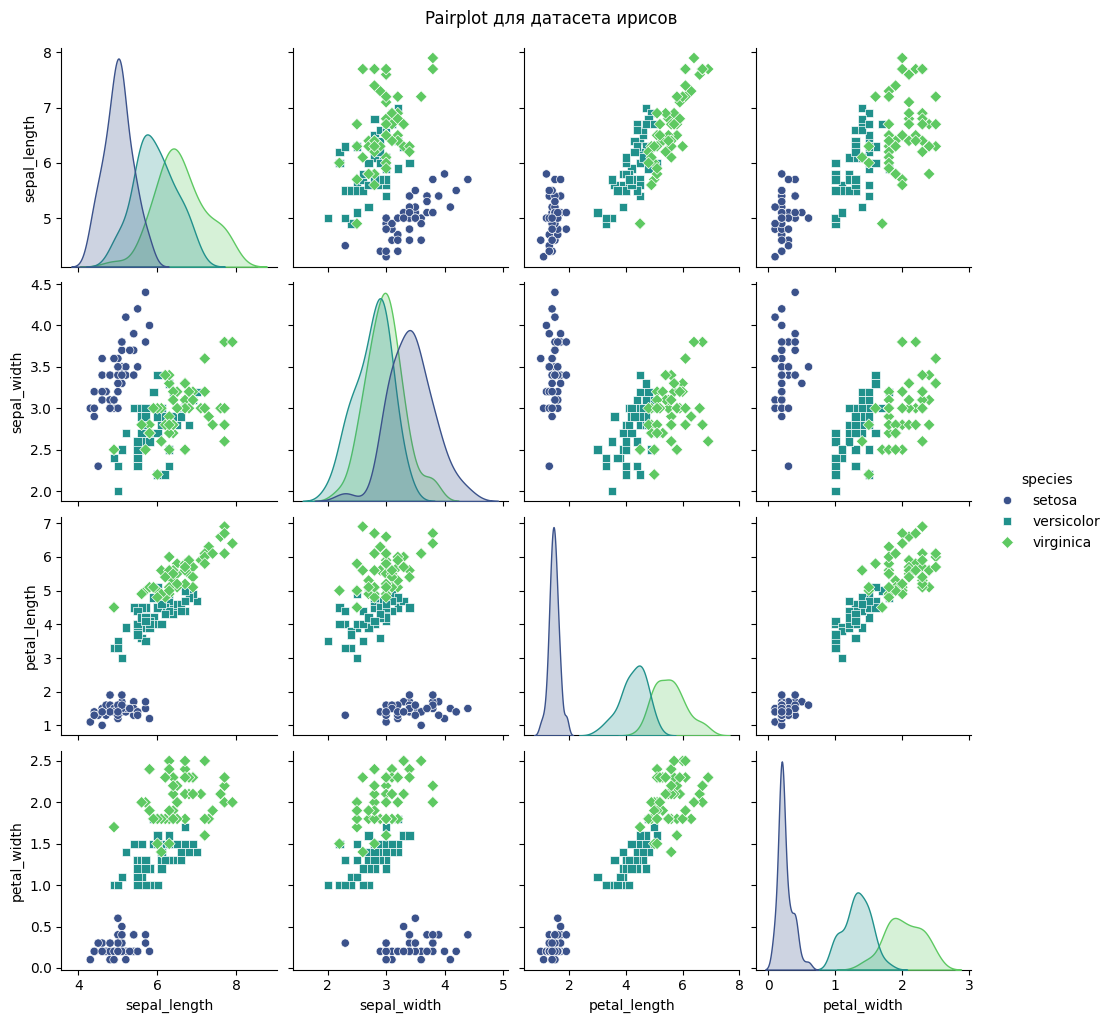

In [6]:
# Загрузка датасета ирисов
iris = sns.load_dataset("iris")

# Построение pairplot
sns.pairplot(iris, hue="species", palette="viridis", markers=["o", "s", "D"])
plt.suptitle("Pairplot для датасета ирисов", y=1.02)
plt.show()

## LogisticRegression для бинарной классификации

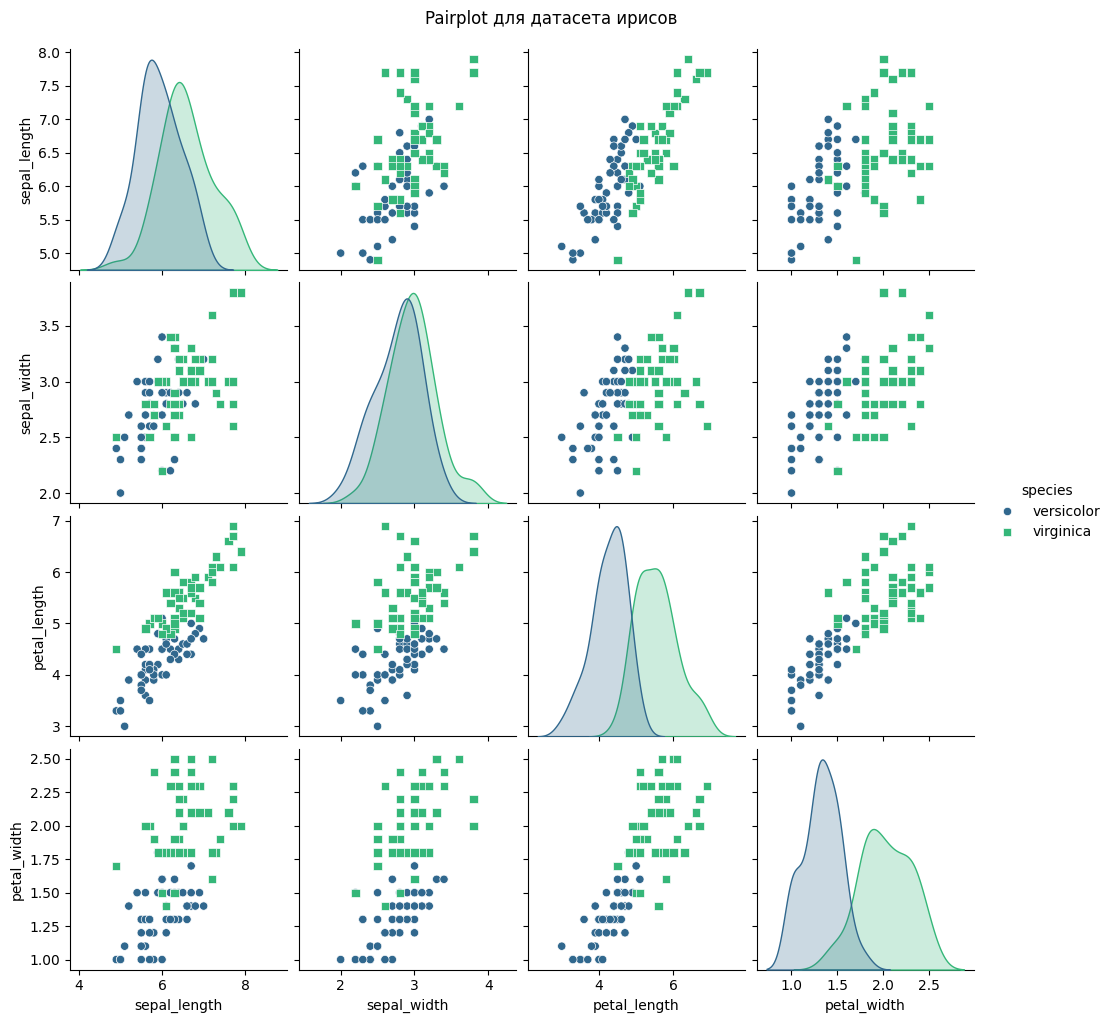

In [12]:
df = iris[iris["species"].isin(["virginica", "versicolor"])]  # Выбираем только 2 класса

# Построение pairplot
sns.pairplot(df, hue="species", palette="viridis", markers=["o", "s", "D"])
plt.suptitle("Pairplot для датасета ирисов", y=1.02)
plt.show()

In [13]:
# Разделение данных
X = df.drop("species", axis=1)
y = df["species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [14]:
# Обучение модели
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [15]:
# Оценка
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



## Переобучение и методы борьбы

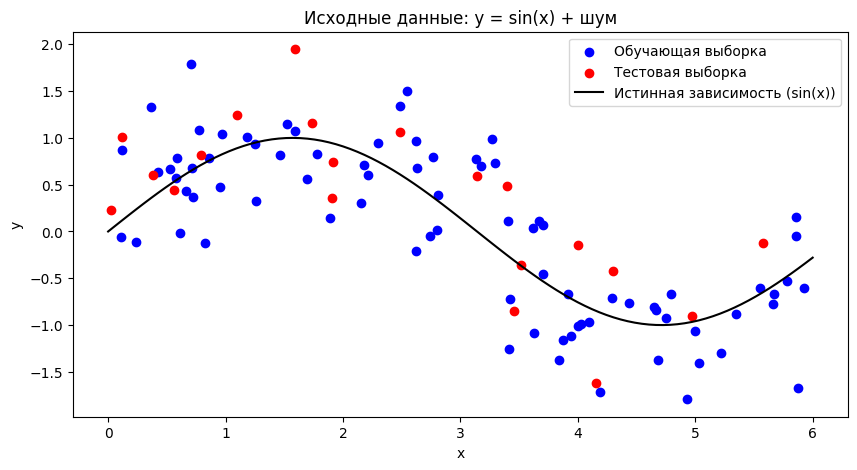

In [27]:
# Генерация данных
np.random.seed(42)
n = 100
x = stats.uniform.rvs(size=n, loc=0, scale=6, random_state=0)
f = lambda x: np.sin(x)
y = stats.norm.rvs(size=n, loc=0, scale=0.5, random_state=0) + f(x)

# Разделение на обучающую и тестовую выборки
x_train, x_test = x[:80], x[80:]
y_train, y_test = y[:80], y[80:]

# Визуализация исходных данных
plt.figure(figsize=(10, 5))
plt.scatter(x_train, y_train, color='blue', label='Обучающая выборка')
plt.scatter(x_test, y_test, color='red', label='Тестовая выборка')
plt.plot(np.linspace(0, 6, 100), f(np.linspace(0, 6, 100)), color='black', label='Истинная зависимость (sin(x))')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Исходные данные: y = sin(x) + шум')
plt.show()

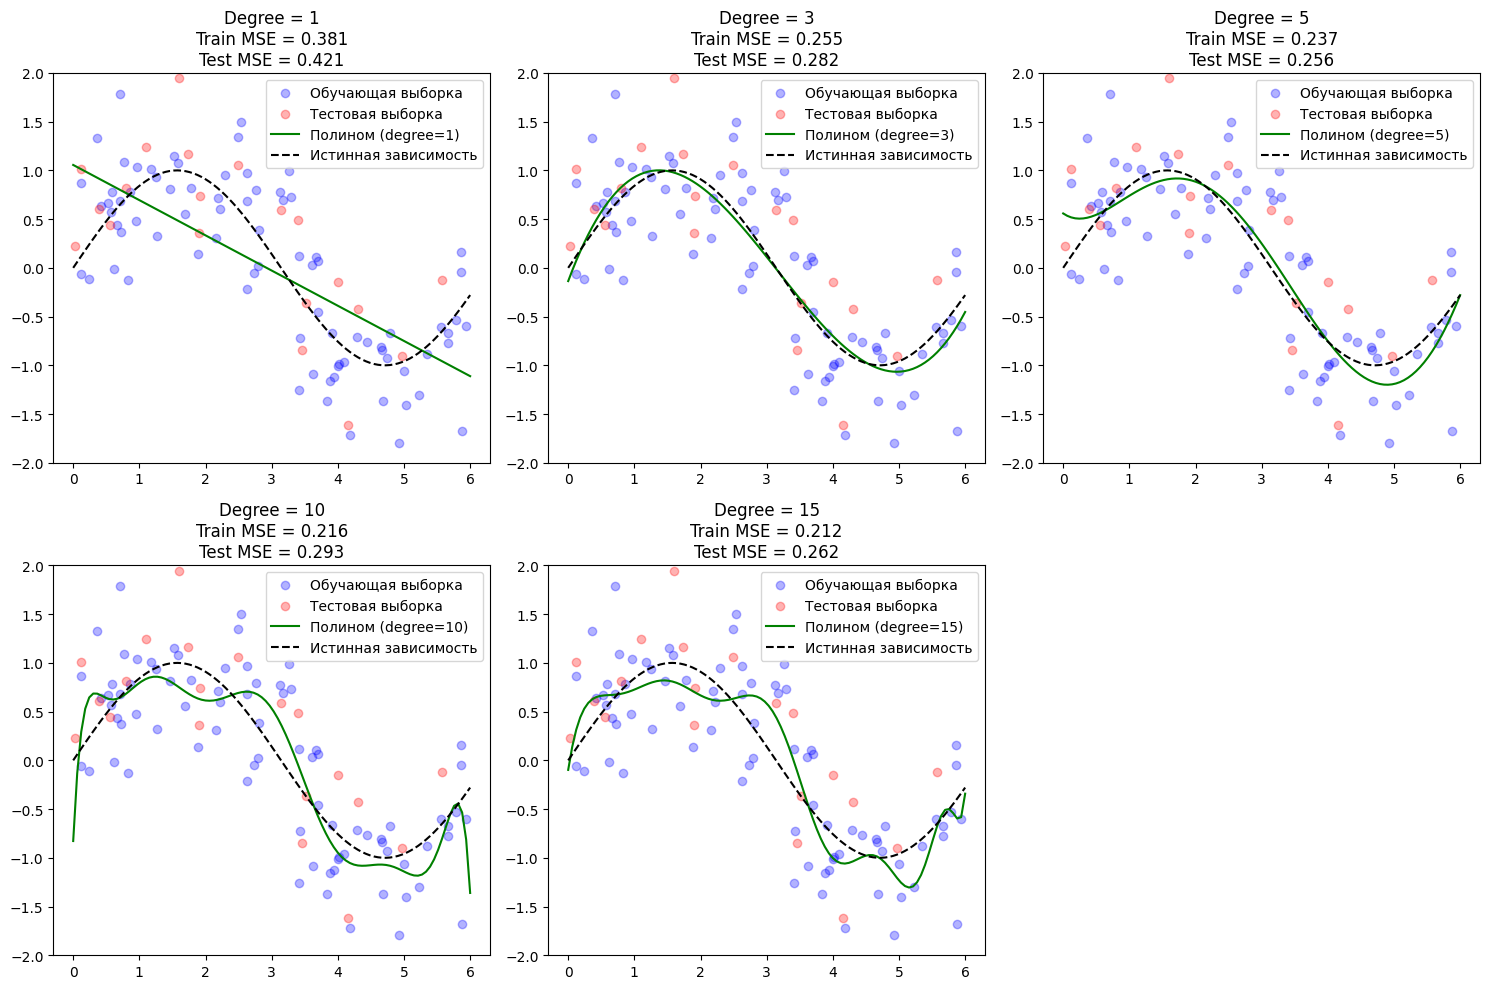

In [28]:
degrees = [1, 3, 5, 10, 15]  # Степени полинома
plt.figure(figsize=(15, 10))

for i, degree in enumerate(degrees):
    # Создание полиномиальных признаков
    poly = PolynomialFeatures(degree=degree)
    x_train_poly = poly.fit_transform(x_train.reshape(-1, 1))
    x_test_poly = poly.transform(x_test.reshape(-1, 1))
    
    # Обучение модели
    model = LinearRegression()
    model.fit(x_train_poly, y_train)
    
    # Предсказание
    x_plot = np.linspace(0, 6, 100).reshape(-1, 1)
    y_plot = model.predict(poly.transform(x_plot))
    
    # График
    plt.subplot(2, 3, i+1)
    plt.scatter(x_train, y_train, color='blue', alpha=0.3, label='Обучающая выборка')
    plt.scatter(x_test, y_test, color='red', alpha=0.3, label='Тестовая выборка')
    plt.plot(x_plot, y_plot, color='green', label=f'Полином (degree={degree})')
    plt.plot(np.linspace(0, 6, 100), f(np.linspace(0, 6, 100)), color='black', linestyle='--', label='Истинная зависимость')
    plt.ylim(-2, 2)
    plt.title(f'Degree = {degree}\nTrain MSE = {mean_squared_error(y_train, model.predict(x_train_poly)):.3f}\nTest MSE = {mean_squared_error(y_test, model.predict(x_test_poly)):.3f}')
    plt.legend()

plt.tight_layout()
plt.show()

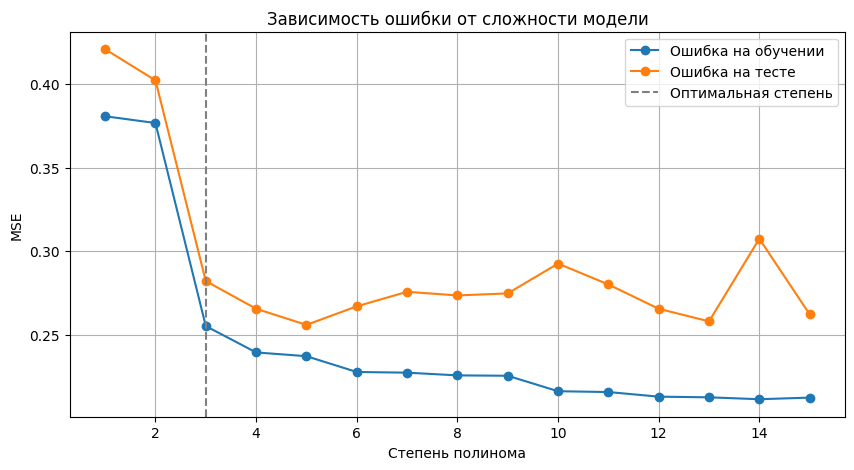

In [29]:
train_errors = []
test_errors = []
degrees = range(1, 16)

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    x_train_poly = poly.fit_transform(x_train.reshape(-1, 1))
    x_test_poly = poly.transform(x_test.reshape(-1, 1))
    
    model = LinearRegression()
    model.fit(x_train_poly, y_train)
    
    train_errors.append(mean_squared_error(y_train, model.predict(x_train_poly)))
    test_errors.append(mean_squared_error(y_test, model.predict(x_test_poly)))

# График ошибок
plt.figure(figsize=(10, 5))
plt.plot(degrees, train_errors, label='Ошибка на обучении', marker='o')
plt.plot(degrees, test_errors, label='Ошибка на тесте', marker='o')
plt.xlabel('Степень полинома')
plt.ylabel('MSE')
plt.title('Зависимость ошибки от сложности модели')
plt.axvline(x=3, color='gray', linestyle='--', label='Оптимальная степень')
plt.legend()
plt.grid()
plt.show()

In [45]:
# Загрузка датасета Iris
iris = sns.load_dataset("iris")
df = iris[iris["species"].isin(["virginica", "versicolor"])]  # Выбираем только 2 класса

X = df.drop("species", axis=1)
y = df["species"]

# Энкодинг
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [46]:
# Инициализация и обучение AutoML
tpot = TPOTClassifier(generations=5, population_size=20, verbose=2, random_state=42, n_jobs=1)
tpot.fit(X_train, y_train)

Generation: 100%|██████████| 5/5 [04:09<00:00, 49.96s/it]

2025-05-05 19:23:42,357 - Removing worker 'tcp://127.0.0.1:34885' caused the cluster to lose scattered data, which can't be recovered: {'ndarray-1f89d5f99a401da55dda8ead3513af85', 'DataFrame-a0c70e2d7d810b620bcec8bee8f6f406'} (stimulus_id='handle-worker-cleanup-1746473022.3575456')


TPOTClassifier(random_state=42,
               search_space=<tpot.search_spaces.pipelines.sequential.SequentialPipeline object at 0x7f5110ccca00>)

In [47]:
best_pipeline = tpot.fitted_pipeline_
print("Test accuracy:", best_pipeline.score(X_test, y_test))

Test accuracy: 0.85


In [49]:
dump(best_pipeline, 'tpot_model.pkl')

['tpot_model.pkl']

## Развёртывание app.py 

In [ ]:
from flask import Flask, request, jsonify
import joblib
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix

app = Flask(__name__)

# Загрузка модели
model = joblib.load('tpot_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()
        features = np.array(data['features']).reshape(1, -1)
        prediction = model.predict(features)
        return jsonify({'prediction': prediction.tolist()[0]})
    except Exception as e:
        return jsonify({'error': str(e)}), 400

@app.route('/metrics', methods=['POST'])
def get_metrics():
    try:
        data = request.get_json()
        X_test = np.array(data['X_test'])
        y_test = np.array(data['y_test'])
        preds = model.predict(X_test)
        return jsonify({
            'f1_macro': float(f1_score(y_test, preds, average='macro')),
            'f1_weighted': float(f1_score(y_test, preds, average='weighted')),
            'confusion_matrix': confusion_matrix(y_test, preds).tolist()
        })
    except Exception as e:
        return jsonify({'error': str(e)}), 400

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)

$python3 app.py 
 * Serving Flask app 'app'
 * Debug mode: off
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.23.49.87:5000
Press CTRL+C to quit